<a href="https://colab.research.google.com/github/susanaglezr/Proyecto-DL-RPS/blob/main/Proyecto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock, paper, scissors

Images of hands playing rock, paper, scissor game.

- Homepage: http://laurencemoroney.com/rock-paper-scissors-dataset

- Source code: tfds.image_classification.RockPaperScissors

- Versions: 3.0.0 (default): New split API (https://tensorflow.org/datasets/splits)



In [1]:
# Importamos la librería tensorflow y el dataset "rock_paper_scissors" del catálogo de datasets de tensorflow.
import tensorflow as tf
import tensorflow_datasets as tfds


datos, metadatos = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete2MP0V3/rock_paper_scissors-train.tfrecord*…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete2MP0V3/rock_paper_scissors-test.tfrecord*.…

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [2]:
metadatos

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='~/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }"

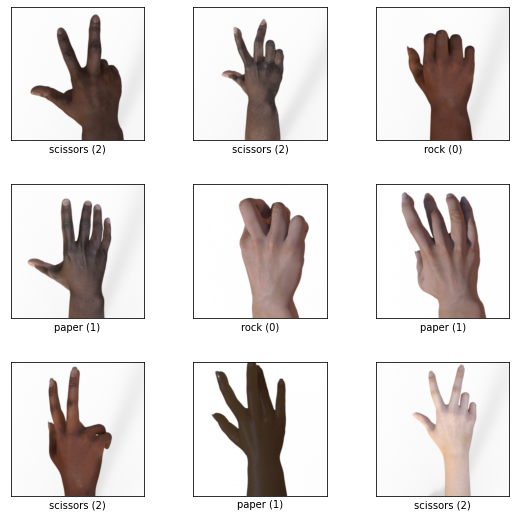

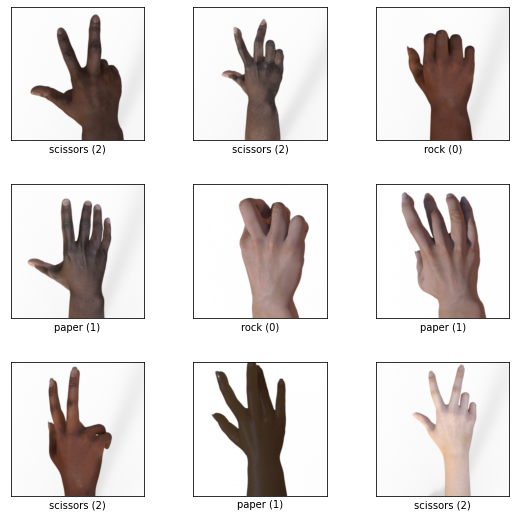

In [40]:
tfds.show_examples(datos['train'], metadatos)

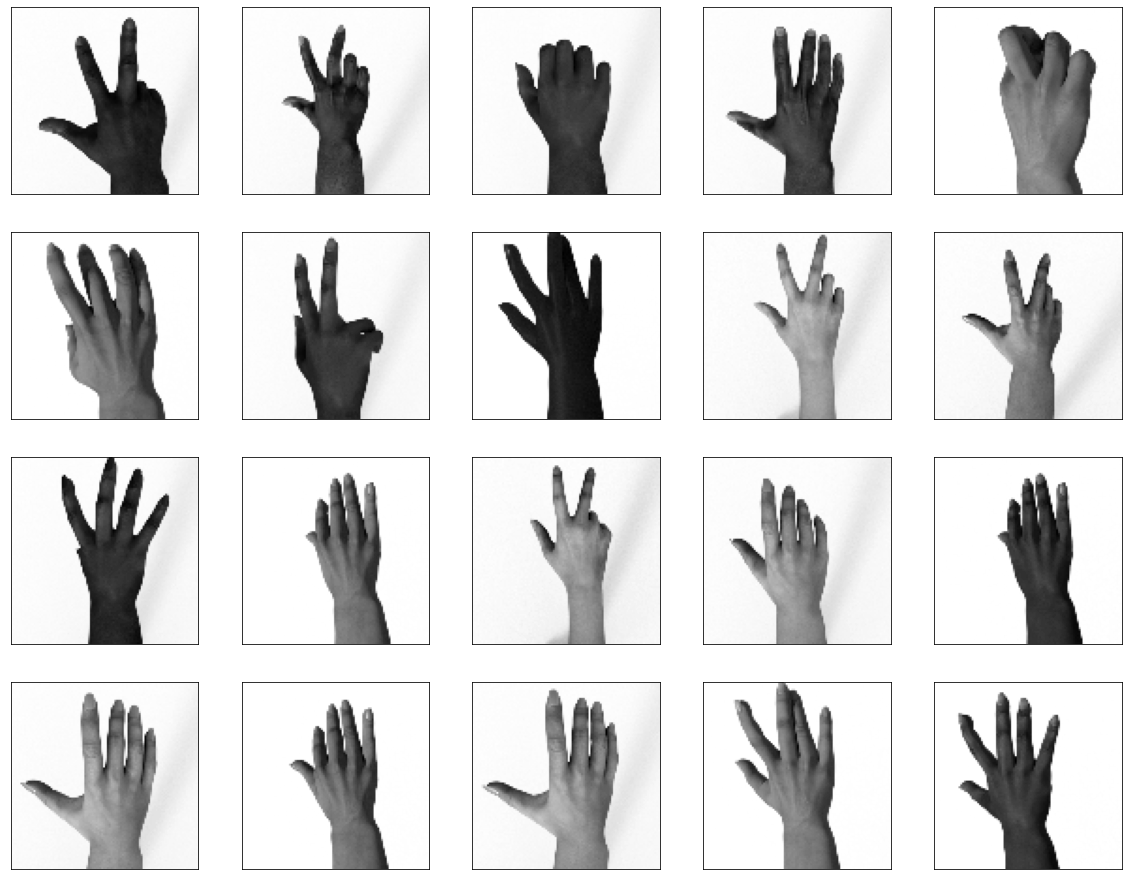

In [41]:
# Para optimizar modificaremos algunas características de las imágenes, reduciremos la cantidad de pixeles 
# y cambiaremos el color a blanco y negro.
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,20))

img_size = 100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(20)):
    imagen = cv2.resize(imagen.numpy(), (img_size, img_size))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen, cmap = 'gray')

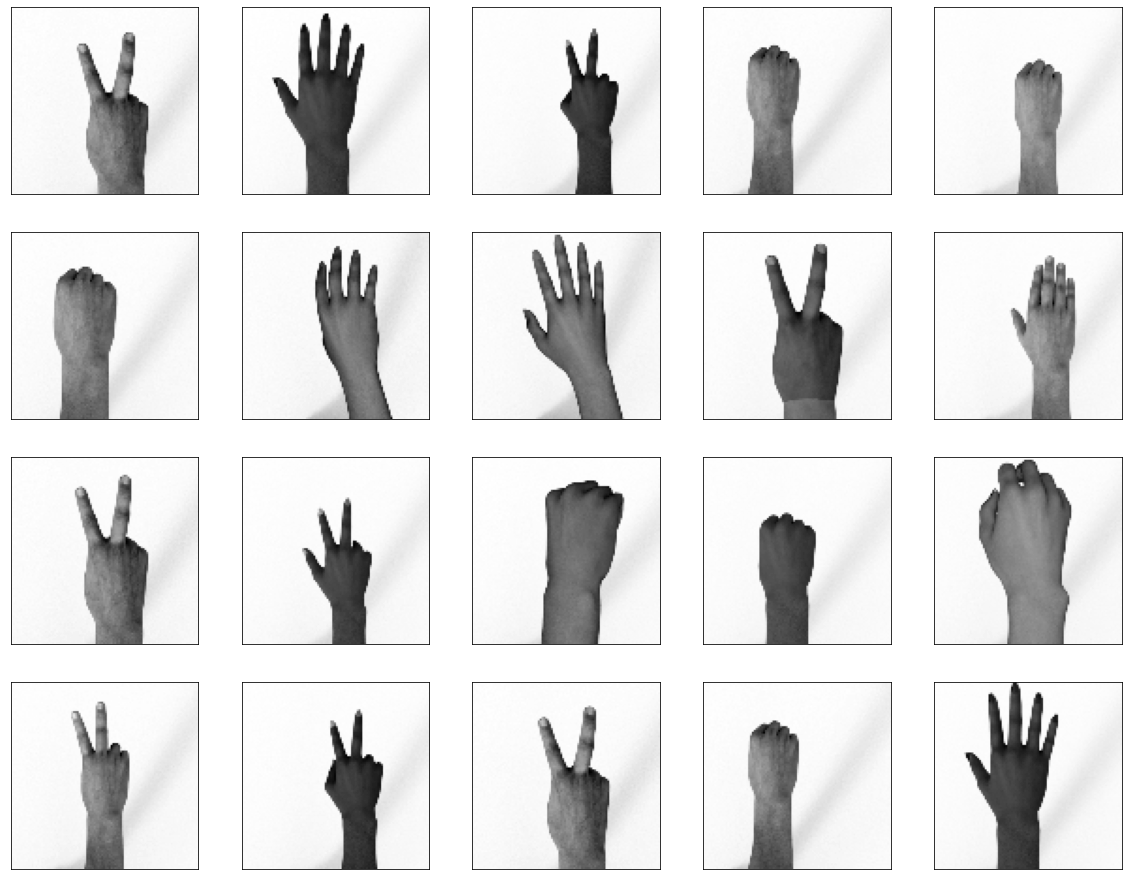

In [42]:
# Lo mismo para los datos de validación
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,20))

img_size = 100

for i, (imagen, etiqueta) in enumerate(datos['test'].take(20)):
    imagen = cv2.resize(imagen.numpy(), (img_size, img_size))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen, cmap = 'gray')

In [138]:
datos_train = []
for i, (imagen, etiqueta) in enumerate(datos['train']):
    imagen = cv2.resize(imagen.numpy(), (img_size, img_size))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(img_size, img_size, 1)
    datos_train.append([imagen, etiqueta])

In [139]:
datos_test = []
for i, (imagen, etiqueta) in enumerate(datos['test']):
    imagen = cv2.resize(imagen.numpy(), (img_size, img_size))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(img_size, img_size, 1)
    datos_test.append([imagen, etiqueta])

In [140]:
datos_train[0]

[array([[[254],
         [254],
         [254],
         ...,
         [251],
         [252],
         [251]],
 
        [[254],
         [254],
         [253],
         ...,
         [251],
         [252],
         [251]],
 
        [[254],
         [254],
         [252],
         ...,
         [251],
         [251],
         [250]],
 
        ...,
 
        [[253],
         [251],
         [251],
         ...,
         [248],
         [248],
         [247]],
 
        [[251],
         [253],
         [252],
         ...,
         [248],
         [247],
         [248]],
 
        [[253],
         [252],
         [251],
         ...,
         [247],
         [249],
         [248]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=2>]

In [141]:
len(datos_train)

2520

In [142]:
datos_test[0]

[array([[[254],
         [254],
         [253],
         ...,
         [252],
         [252],
         [251]],
 
        [[255],
         [254],
         [253],
         ...,
         [252],
         [252],
         [251]],
 
        [[254],
         [253],
         [254],
         ...,
         [252],
         [252],
         [251]],
 
        ...,
 
        [[252],
         [249],
         [251],
         ...,
         [250],
         [250],
         [249]],
 
        [[251],
         [251],
         [252],
         ...,
         [250],
         [250],
         [249]],
 
        [[252],
         [251],
         [249],
         ...,
         [249],
         [250],
         [250]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=2>]

In [143]:
len(datos_test)

372

In [144]:
x_train = [] #imagenes
y_train = [] #etiquetas

for imagen, etiqueta in datos_train:
    x_train.append(imagen)
    y_train.append(etiqueta)

In [145]:
x_test = [] #imagenes
y_test = [] #etiquetas

for imagen, etiqueta in datos_test:
    x_test.append(imagen)
    y_test.append(etiqueta)

In [146]:
import numpy as np
x_train = np.array(x_train).astype(float)/255

In [147]:
x_test = np.array(x_test).astype(float)/255

In [148]:
x_test

array([[[[0.99607843],
         [0.99607843],
         [0.99215686],
         ...,
         [0.98823529],
         [0.98823529],
         [0.98431373]],

        [[1.        ],
         [0.99607843],
         [0.99215686],
         ...,
         [0.98823529],
         [0.98823529],
         [0.98431373]],

        [[0.99607843],
         [0.99215686],
         [0.99607843],
         ...,
         [0.98823529],
         [0.98823529],
         [0.98431373]],

        ...,

        [[0.98823529],
         [0.97647059],
         [0.98431373],
         ...,
         [0.98039216],
         [0.98039216],
         [0.97647059]],

        [[0.98431373],
         [0.98431373],
         [0.98823529],
         ...,
         [0.98039216],
         [0.98039216],
         [0.97647059]],

        [[0.98823529],
         [0.98431373],
         [0.97647059],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98039216]]],


       [[[0.99607843],
         [0.99607843],
         [0.99

In [149]:
x_train

array([[[[0.99607843],
         [0.99607843],
         [0.99607843],
         ...,
         [0.98431373],
         [0.98823529],
         [0.98431373]],

        [[0.99607843],
         [0.99607843],
         [0.99215686],
         ...,
         [0.98431373],
         [0.98823529],
         [0.98431373]],

        [[0.99607843],
         [0.99607843],
         [0.98823529],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],

        ...,

        [[0.99215686],
         [0.98431373],
         [0.98431373],
         ...,
         [0.97254902],
         [0.97254902],
         [0.96862745]],

        [[0.98431373],
         [0.99215686],
         [0.98823529],
         ...,
         [0.97254902],
         [0.96862745],
         [0.97254902]],

        [[0.99215686],
         [0.98823529],
         [0.98431373],
         ...,
         [0.96862745],
         [0.97647059],
         [0.97254902]]],


       [[[1.        ],
         [0.99215686],
         [0.99

In [150]:
y_train

[<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [151]:
y_train = np.array(y_train)

In [152]:
y_test = np.array(y_test)

In [153]:
y_train

array([2, 2, 0, ..., 1, 1, 1])

In [154]:
y_test

array([2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2,
       0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [155]:
x_train.shape

(2520, 100, 100, 1)

In [156]:
x_test.shape

(372, 100, 100, 1)

In [157]:
# Hacer one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [178]:
modelo = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (2,2),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [179]:
modelo.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [180]:
batch_size = 69

In [181]:
steps_per_epoch = len(x_train)//batch_size
steps_per_epoch 

36

In [182]:
validation_steps = len(x_test)//batch_size
validation_steps

5

In [183]:
history = modelo.fit(x_train, y_train, steps_per_epoch=36, epochs= 10, validation_data=(x_test, y_test) , validation_steps=5)

Epoch 1/10
36/36 [==============================] - 1s 30ms/step - loss: 0.9570 - accuracy: 0.6135 - val_loss: 0.6743 - val_accuracy: 0.7312
Epoch 2/10
36/36 [==============================] - 1s 25ms/step - loss: 0.1735 - accuracy: 0.9556 - val_loss: 0.4360 - val_accuracy: 0.8199
Epoch 3/10
36/36 [==============================] - 1s 24ms/step - loss: 0.0407 - accuracy: 0.9917 - val_loss: 0.5181 - val_accuracy: 0.8091
Epoch 4/10
36/36 [==============================] - 1s 24ms/step - loss: 0.0245 - accuracy: 0.9956 - val_loss: 0.5419 - val_accuracy: 0.8118
Epoch 5/10
36/36 [==============================] - 1s 25ms/step - loss: 0.0135 - accuracy: 0.9980 - val_loss: 0.7029 - val_accuracy: 0.7957
Epoch 6/10
36/36 [==============================] - 1s 25ms/step - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.7004 - val_accuracy: 0.8038
Epoch 7/10
36/36 [==============================] - 1s 24ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.7388 - val_accuracy: 0.8038
Epoch 8/10
36

In [184]:
(len(history.history['accuracy']), len(history.history['val_accuracy']))

(10, 10)

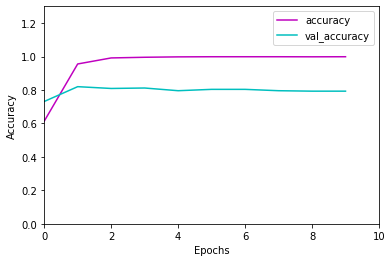

In [185]:
plt.plot(history.history['accuracy'], c = 'm')
plt.plot(history.history['val_accuracy'], c = 'c')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.xlim(0,10)
plt.ylim(0,1.3)
plt.show()

In [186]:
(len(history.history['loss']), len(history.history['val_loss']))

(10, 10)

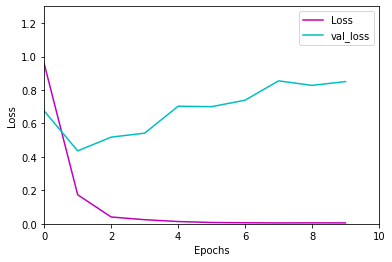

In [187]:
plt.plot(history.history['loss'], c = 'm')
plt.plot(history.history['val_loss'], c = 'c')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['Loss', 'val_loss'])
plt.xlim(0,10)
plt.ylim(0,1.3)
plt.show()